In [1]:
import warnings

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from cmlreaders import CMLReader, get_data_index

In [2]:
import Reader
import ComputePower
import erps

/home1/shai.goldman/anaconda2/envs/py3_env/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
warnings.filterwarnings('ignore')

In [5]:
EXPERIMENT = 'TH1'

In [6]:
df = get_data_index('r1')
df = df[df['experiment']==EXPERIMENT]
subjects = df[['subject', 'montage', 'localization', 'experiment']].drop_duplicates()
subjects.index = range(len(subjects))

In [7]:
# excluding these to match the patients used in the published paper
exclude = ['R1132C', 'R1243T', 'R1244J','R1258T','R1230J','R1269E','R1259E','R1226D','R1214M',
           'R1215M', 'R1233E', 'R1263C','R1160C','R1282C','R1227T','R1182C','R1184M','R1198M']
subjects = subjects[~subjects['subject'].isin(exclude)]

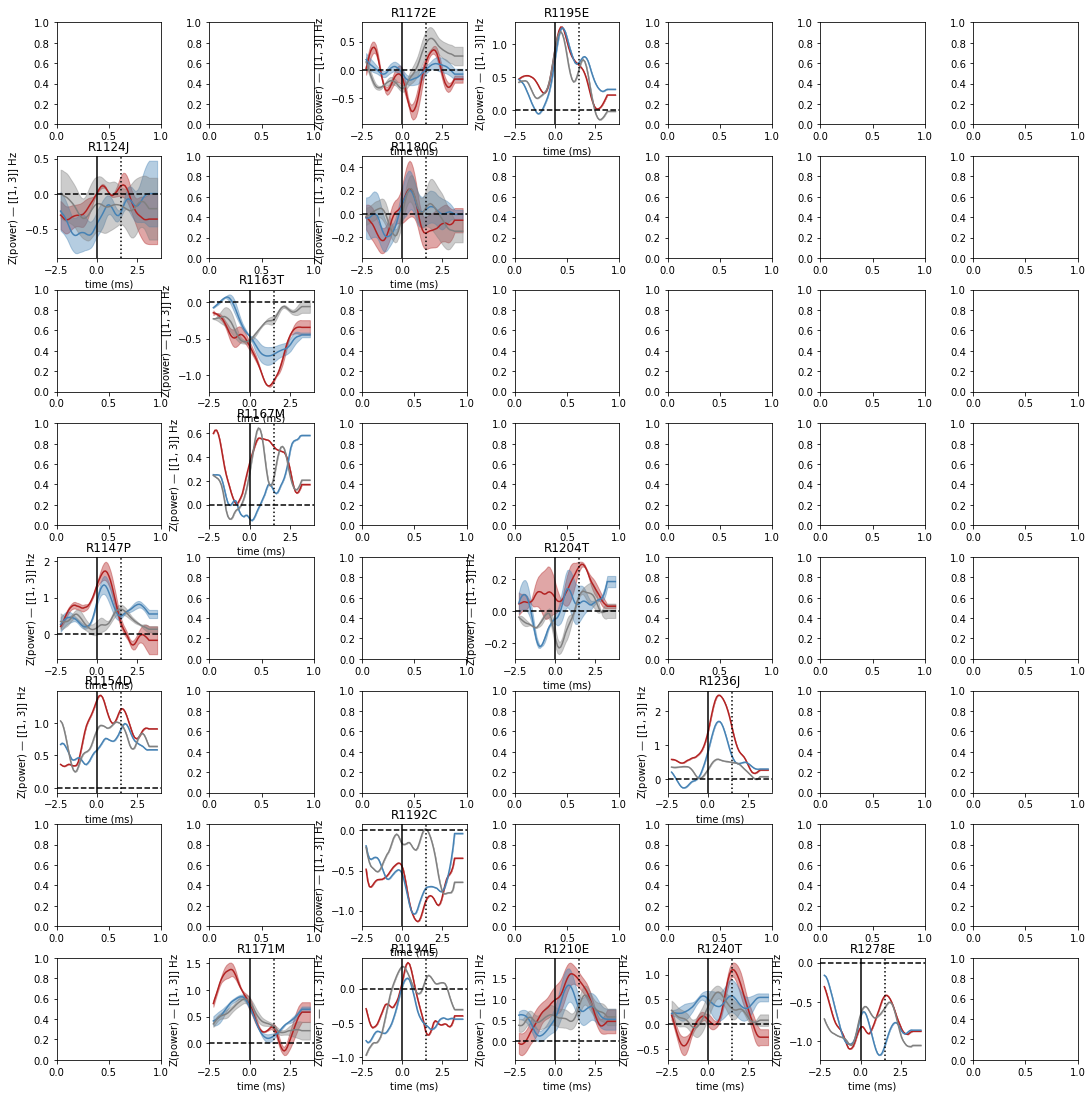

NameError: name 'plot_erp' is not defined

In [8]:
erps = erps.get_erps(subjects, region='Left CA1', freq_band=[1,3], graphit=True,
                            transform='wavelet', load_type='pairs', log_power=True
               )
plot_erp(erps.erps)

In [ ]:
if 0:
    regions = ['Left CA1', 'Right CA1', 'Left EC', 'Right EC']
    freq_bands = [[40,100], [3,10], [1,3]]

    fig, axes = plt.subplots(nrows=len(freq_bands), ncols=len(regions), figsize=((20,20)))

    for col, region in enumerate(regions):
        for row, freq_band in enumerate(freq_bands):
            ax = axes[row, col]

            erps = get_erps(subjects, region=region, freq_band=freq_band, graphit=False,
                            transform='wavelet', load_type='contacts', log_power=False
                           )
            plot_erp(erps, axes=ax)

            if row == 0:
                ax.set_title(region)
    fig.savefig('temp.pdf', format='pdf')